# Binomial Distribution

---

## Import

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statistics
from scipy import stats

%matplotlib inline
plt.style.use("fivethirtyeight")

---

## Utilities

In [2]:
def get_discrete_ticks(xmin, xmax):
    cuts = [5, 10, 20, 50, 100, 200, 500, 1000]
    ticks = np.arange(xmin, xmax + 1)
    if len(ticks) > 15:
        for cut in cuts:
            ticks = [tick for tick in ticks if tick % cut == 0]
            if len(ticks) <= 15:
                return ticks
        return ticks
    return ticks

In [3]:
def get_bins(xmin, xmax, step = 1):
    bins = np.arange(xmin, xmax, step)
    bins = bins if len(bins) > 2 else get_bins(xmin, xmax + 1, step)
    return bins if len(bins) <= 100 \
        else get_bins(xmin, xmax, step = step + 1)

In [4]:
def plot_discrete_distribution(f, x_axis, obs = None, q = None, **kwargs):
    pmf = f.pmf(x_axis, **kwargs)
    fig, ax = plt.subplots(figsize = (8, 4))
    bars = ax.bar(x_axis, pmf, edgecolor = "k", linewidth = 2)
    
    print(f"Mean: {f.mean(**kwargs)}")
    print(f"Median: {f.median(**kwargs)}")
    print(f"Variance: {f.var(**kwargs)}")
    print(f"Standard Deviation: {f.std(**kwargs)}")
    print("-" * 10)
    if obs:
        plt.setp(bars[obs - x_axis.min()], color = "r", linewidth = 2)
        plt.setp(bars[obs - x_axis.min()], edgecolor = "k")
        obs_pmf = f.pmf(obs, **kwargs)
        print(f"PMF({obs}) = {obs_pmf}")
        
    plt.xticks(get_discrete_ticks(xmin = x_axis.min(), xmax = x_axis.max()))
    plt.show()

In [5]:
def sample_discrete_distribution(f, size = 1, seed = None, **kwargs):
    sample = f.rvs(size = size, random_state = seed, **kwargs)
    
    print(f"Min: {np.min(sample)}")
    print(f"Mean: {np.mean(sample)}")
    print(f"Median: {np.median(sample)}")
    print(f"Max: {np.max(sample)}")
    print(f"Variance: {np.var(sample, ddof = 0)}")
    print(f"Standard Deviation: {np.std(sample, ddof = 0)}")
    
    fig, ax = plt.subplots(figsize = (8, 4))
   
    plt.hist(x = sample,
             density = True,
             edgecolor = "k",
             bins = get_bins(sample.min(), sample.max() + 1),
             linewidth = 2)

    plt.xticks(get_discrete_ticks(sample.min(), sample.max()))
    plt.show()
    return sample

---

Dati $n$ *trial* indipendenti di un esperimento di Bernoulli, una variabile aleatoria binomiale modella il numero di *successi* (cioè il numero di volte in cui si verifica l'evento d'interesse) ottenuti all'interno degli $n$ *trial*. 

Più in generale, la distribuzione binomiale descrive la probabilità di osservare esattamente $k$ successi in $n$ *Bernoulli trials* indipendenti con probabilità di successo pari a $p$.

**PMF**:

$$\large P(X=k)=\binom n k\; p^k(1-p)^{n-k}\;\;\;\;\;\;\;\;
k=0,\dots,n$$

Sappiamo che il numero di combinazioni possibili di $k$ oggetti senza *replacement* e senza ordinamento a partire da $n$ oggetti totali è uguale a *n choose k*. Tale numero di combinazioni è poi moltiplicato per la probabilità di successo elevata alla k-esima potenza (ci sono infatti $k$ successi) e per la probabilità di falimento elevata alla (n-k)-esima potenza (ci sono infatti $n-k$ fallimenti).

**Expectation** e **Variance**:

$$\large E(X)=np$$

$$\large Var(X)=np(1-p)$$

---

All'aumentare del *sample size* o, alternativamente, del numero di tentativi $n$, la distribuzione binomiale assume un andamento molto vicino a quello della distribuzione *normale*. In particolare, la *normale* approssimata avrebbe media pari a $np$ e deviazione standard pari a $\sqrt{np(1-p)}$.

Per accertarsi che l'approssimazione *normale* sia effettivamente applicabile alla distribuzione *binomiale* in analisi, è necessario applicare la **Success-Failure Rule**: essa afferma che, data una distribuzione binomiale con almeno 10 *expected successes* e almeno 10 *expected failures* segue un andamento molto simile a quello della *distribuzione normale*.

$$\large np\geq10$$<br>
$$\large n(1-p)\geq10$$

$$\large Binomial(n, p) \sim Normal(\mu, \sigma)$$<br>
$$\large \mu=np$$<br>
$$\large \sigma=\sqrt{np(1-p)}$$

Quest'approssimazione ci permette di sfruttare gli *Z Score* e il calcolo delle aree sottese alla curva normale all'interno di problemi nativamente binomiali. E' necessario, però, al momento del calcolo dello *Z score*, sottrarre $0.5$ all'osservazione di riferimento (la $x$ di $Z=(x-\mu)/\sigma$) per compensare il grado di approssimazione introdotto nel passaggio dal contesto binomiale a quello normale.

Sappiamo, inoltre, che la binomiale è perfettamente simmetrica per $p=0.5$, mentre presenta una *skewness* per $p\neq 0.5$. Per questo motivo, l'approssimazione normale è ideale per distribuzioni la cui probabilità di successo è molto vicina a 0.5, e ovviamente quando *n* è molto grande.

---

#### Probability Mass Function

Mean: 6.0
Median: 6.0
Variance: 2.4000000000000004
Standard Deviation: 1.5491933384829668
----------


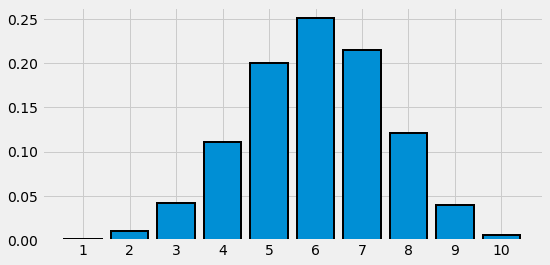

In [6]:
p = 0.6
n = 10

plot_discrete_distribution(f = stats.binom,
                           x_axis = np.arange(1, n + 1),
                           p = p,
                           n = n)

---

#### RVS

Min: 1
Mean: 6.01
Median: 6.0
Max: 10
Variance: 2.5739
Standard Deviation: 1.6043378696521504


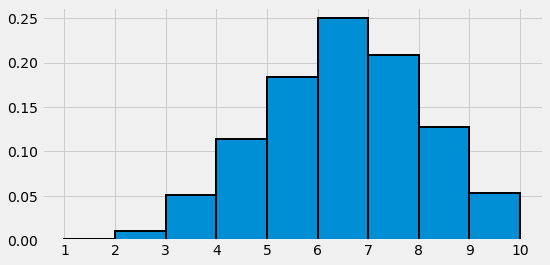

In [7]:
p = 0.6
n = 10

sample = sample_discrete_distribution(f = stats.binom,
                                      size = 1000,
                                      p = p,
                                      n = n)

---

**[Esempio]** Si lancia un dado tre volte. Qual è la probabilità che esca 5 esattamente due volte?

Possiamo modellare una variabile aleatoria $X$ dove il successo è il numero 5, con probabilità 1/6 e il fallimento è l'insieme di tutti gli altri *outcome*, evento con probabilità 5/6

In [8]:
stats.binom.pmf(n = 3, p = 1/6 , k = 2)

0.06944444444444445

---

**[Esempio]** La probabilità che un 90enne viva un altro anno è 0.82. Seleziono 20 90enni a caso; qual è la probabilità che esattamente 18 di essi sopravvivano un altro anno?

In [9]:
stats.binom.pmf(n = 20, p = 0.82, k = 18)

0.1729609070113259

Mostriamo anche la distribuzione per tutti i possibili successi, non solo 18:

Mean: 16.4
Median: 17.0
Variance: 2.9520000000000004
Standard Deviation: 1.7181385275931624
----------


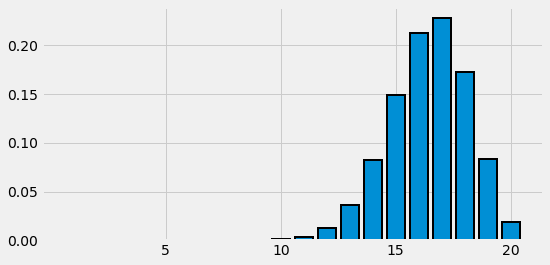

In [10]:
n = 20
p = 0.82

plot_discrete_distribution(f = stats.binom,
                           x_axis = np.arange(1, n + 1),
                           p = p,
                           n = n)

L'aspettazione è 16.4, quindi circa 16 di questi 20 uomini in media sopravviveranno ad almeno un altro anno.

Ma qual è la probabilità che *almeno* 18 uomini sopravvivano un altro anno?

In [11]:
np.sum(stats.binom.pmf(n = 20, p = 0.82, k = [18, 19, 20]))

0.2747931863114964

---

**[Esercizio]** Usiamo l'approssimazione normale per calcolare la probabilità che una variabile binomiale assuma valore uguale o superiore a 52 quando il numero di trial è 75 e la probabilità di successo è 0.6

In [12]:
obs = 52
trials = 75
prob_success = 0.6

mu = trials * prob_success
sigma = np.sqrt(trials * prob_success * (1 - prob_success))

mu, sigma

(45.0, 4.242640687119285)

In [13]:
stats.norm.sf(x = obs,
              loc = mu,
              scale = sigma)

0.04948007700970287

Quasi 5%! Ora usiamo la binomiale:

In [14]:
np.sum(stats.binom.pmf(k = np.arange(obs, trials+1),
                       n = trials,
                       p = prob_success))

0.06109840548510502

6%! L'approssimazione è buona. Ora applichiamo la **continuity correction**. Useremo 51.5 e non 52!

In [15]:
obs = 51.5
trials = 75
prob_success = 0.6

mu = trials * prob_success
sigma = np.sqrt(trials * prob_success * (1 - prob_success))

stats.norm.sf(x = obs,
              loc = mu,
              scale = sigma)

0.06275323571873455

L'approssimazione ora è quasi perfetta!

Se al posto di maggiore o uguale a 52, la domanda volesse sapere con che probabilità la variabile assume valore strettamente maggiore di 52, la *continuity correction* ci avrebbe portato a considerare 52.5 e non 51.5!

In [16]:
min_num_successes = 53
trials = 75
prob_success = 0.6

np.sum(stats.binom.pmf(k = np.arange(min_num_successes, trials+1),
                       n = trials,
                       p = prob_success))

0.036736361447161456

Usiamo l'approssimazione normale:

In [17]:
obs = 52.5
trials = 75
prob_success = 0.6

mu = trials * prob_success
sigma = np.sqrt(trials * prob_success * (1 - prob_success))

stats.norm.sf(x = obs,
              loc = mu,
              scale = sigma)

0.03854993587177085

Approssimazione quasi perfetta!

---